In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
df=pd.read_csv("Covid Dataset.csv")

In [3]:
df=df.fillna(0)
df.shape
df=df.replace(["Yes","No"],[1,0])

In [4]:
x = df[['Breathing Problem','Fever','Dry Cough','Sore throat','Running Nose','Asthma','Headache','Abroad travel','Contact with COVID Patient','Attended Large Gathering','Visited Public Exposed Places','Family working in Public Exposed Places']]
y=df['COVID-19']
X= preprocessing.StandardScaler().fit(x).transform(x)
X

array([[ 0.70788768,  0.52125432,  0.51153402, ..., -0.92650587,
         0.96278261,  1.184187  ],
       [ 0.70788768,  0.52125432,  0.51153402, ...,  1.07932397,
         0.96278261, -0.84446122],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.92650587,
        -1.03865607, -0.84446122],
       ...,
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.92650587,
        -1.03865607, -0.84446122],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.92650587,
        -1.03865607, -0.84446122],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.92650587,
        -1.03865607, -0.84446122]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)   #change in random state 
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))

[1 0 1 ... 1 1 1]


In [6]:
print("TRAIN SCORE:",knn.score(X_train, y_train))
print("TEST SCORE:",knn.score(X_test, y_test))

TRAIN SCORE: 0.9813664596273292
TEST SCORE: 0.983440662373505


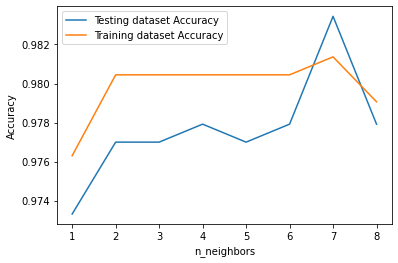

In [7]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
#OUTPUT FOR THE SPECIFIED INPUT:
BreathingProblem=0
Fever=1
DryCough=1
Sorethroat=1
RunningNose=1
Asthma=0
Headache=0
Abroadtravel=0
Contact_with_COVID_Patient=0
Attended_Large_Gathering=0
Visited_Public_Exposed_Places=0
Family_working_in_Public_Exposed_Places=0
myinput = [[BreathingProblem,Fever,DryCough,Sorethroat,RunningNose,Asthma,Headache,Abroadtravel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]
myoutput = knn.predict(myinput)
print("0 stands for 'NO' and 1 stands for 'YES'")
print("GIVEN INPUTS:")
print("BreathingProblem:",BreathingProblem)
print("Fever:",Fever)
print("DryCough:",DryCough)
print("Sorethroat:",Sorethroat)
print("RunningNose:",RunningNose)
print("Asthma:",Asthma)
print("Headache:",Headache)
print("Abroadtravel:",Abroadtravel)
print("Contact_with_COVID_Patient:",Contact_with_COVID_Patient)
print("Attended_Large_Gathering:",Attended_Large_Gathering)
print("Visited_Public_Exposed_Places:",Visited_Public_Exposed_Places)
print("Family_working_in_Public_Exposed_Places:",Family_working_in_Public_Exposed_Places)
print("\n")
print("OUTPUT:")
if(myoutput==1):
    print("The Person is said to have higher chances of having COVID")
else:
    print("The Person doesn't have COVID")

0 stands for 'NO' and 1 stands for 'YES'
GIVEN INPUTS:
BreathingProblem: 0
Fever: 1
DryCough: 1
Sorethroat: 1
RunningNose: 1
Asthma: 0
Headache: 0
Abroadtravel: 0
Contact_with_COVID_Patient: 0
Attended_Large_Gathering: 0
Visited_Public_Exposed_Places: 0
Family_working_in_Public_Exposed_Places: 0


OUTPUT:
The Person is said to have higher chances of having COVID
